In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/imprime/selfdriving-car-dataset/data?select=data-master")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joeducer
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/imprime/selfdriving-car-dataset


100%|██████████| 297M/297M [00:18<00:00, 17.0MB/s]


In [ ]:
import kagglehub
imprime_selfdriving_car_dataset_path = kagglehub.dataset_download('imprime/selfdriving-car-dataset')

print('Data source import complete.')


100%|██████████| 297M/297M [00:14<00:00, 22.2MB/s]

Extracting files...


Data source import complete.


"""Self Driving Car Simulation"""
Its a Self Driving Car Using Convolutional Neural Networks Via Using NVIDIA Model Architecture for End To End Self Driving Car And For Simulation Using Udacity Open Source Unity Self Driving Car Simulator.

I have created my own dataset using Udacity simulator self-driving car training mode and after that, trained my model on that dataset.

Credits-
NVIDIA's paper: End to End Learning for Self-Driving Cars for the inspiration and model structure.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.image as mpimg

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D,Dense,MaxPooling2D,Dropout,Flatten
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import random
import ntpath

In [ ]:
datadir = '/content/selfdriving-car-dataset/data-master'

In [ ]:
columns = ['center','left','right','steering','throttle','reverse','speed']

In [ ]:
dataset = pd.read_csv(os.path.join(datadir,'/content/selfdriving-car-dataset/data-master/driving_log.csv'),names=columns)

In [ ]:
os.path.join(datadir,'/content/selfdriving-car-dataset/data-master/driving_log.csv')

'/content/selfdriving-car-dataset/data-master/driving_log.csv'

In [ ]:
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
1,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
2,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000079
3,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
4,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000079


In [ ]:
dataset.shape

(7259, 7)

In [ ]:
#Function to remove long paths of the images to just the image name
def removePath(path):
  base,tail = ntpath.split(path)
  return tail

In [ ]:
dataset['center'] = dataset['center'].apply(removePath)

In [ ]:
dataset['left'] = dataset['left'].apply(removePath)

In [ ]:
dataset['right'] = dataset['right'].apply(removePath)

In [ ]:
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_10_17_16_36_30_865.jpg,left_2018_10_17_16_36_30_865.jpg,right_2018_10_17_16_36_30_865.jpg,0.0,0.0,0.0,0.000078
1,center_2018_10_17_16_36_30_966.jpg,left_2018_10_17_16_36_30_966.jpg,right_2018_10_17_16_36_30_966.jpg,0.0,0.0,0.0,0.000078
2,center_2018_10_17_16_36_31_098.jpg,left_2018_10_17_16_36_31_098.jpg,right_2018_10_17_16_36_31_098.jpg,0.0,0.0,0.0,0.000079
3,center_2018_10_17_16_36_31_253.jpg,left_2018_10_17_16_36_31_253.jpg,right_2018_10_17_16_36_31_253.jpg,0.0,0.0,0.0,0.000078
4,center_2018_10_17_16_36_31_366.jpg,left_2018_10_17_16_36_31_366.jpg,right_2018_10_17_16_36_31_366.jpg,0.0,0.0,0.0,0.000079


In [ ]:
# Setting Up the Histogram Bins (For understanding the steering angle distribution)
num_bins = 25

In [ ]:
#Creating the Histogram
#bins are the boundary values
hist,bins = np.histogram(dataset['steering'],num_bins)

In [ ]:
print(hist)
print(bins)

[  48   16   13   15   21   36   48   69  161  174  337  239 5454   56
  160   82   97   99   37   25   32   15   12    5    8]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


In [ ]:
#Calculating Bin Centers (Vectorized Approac
center = (bins[:-1]+bins[1:])*0.5

In [ ]:
center

array([-0.96, -0.88, -0.8 , -0.72, -0.64, -0.56, -0.48, -0.4 , -0.32,
       -0.24, -0.16, -0.08,  0.  ,  0.08,  0.16,  0.24,  0.32,  0.4 ,
        0.48,  0.56,  0.64,  0.72,  0.8 ,  0.88,  0.96])

In [ ]:
center1 = []
for i in range(0,len(bins)-1):
  x = (bins[i] + bins[i+1]) * 0.5
  center1.append(x)

In [ ]:
center1

[-0.96,
 -0.88,
 -0.8,
 -0.72,
 -0.6399999999999999,
 -0.56,
 -0.48,
 -0.39999999999999997,
 -0.32,
 -0.24,
 -0.15999999999999998,
 -0.08000000000000002,
 0.0,
 0.08000000000000007,
 0.16000000000000003,
 0.24,
 0.32000000000000006,
 0.4,
 0.48,
 0.56,
 0.64,
 0.72,
 0.8,
 0.88,
 0.96]

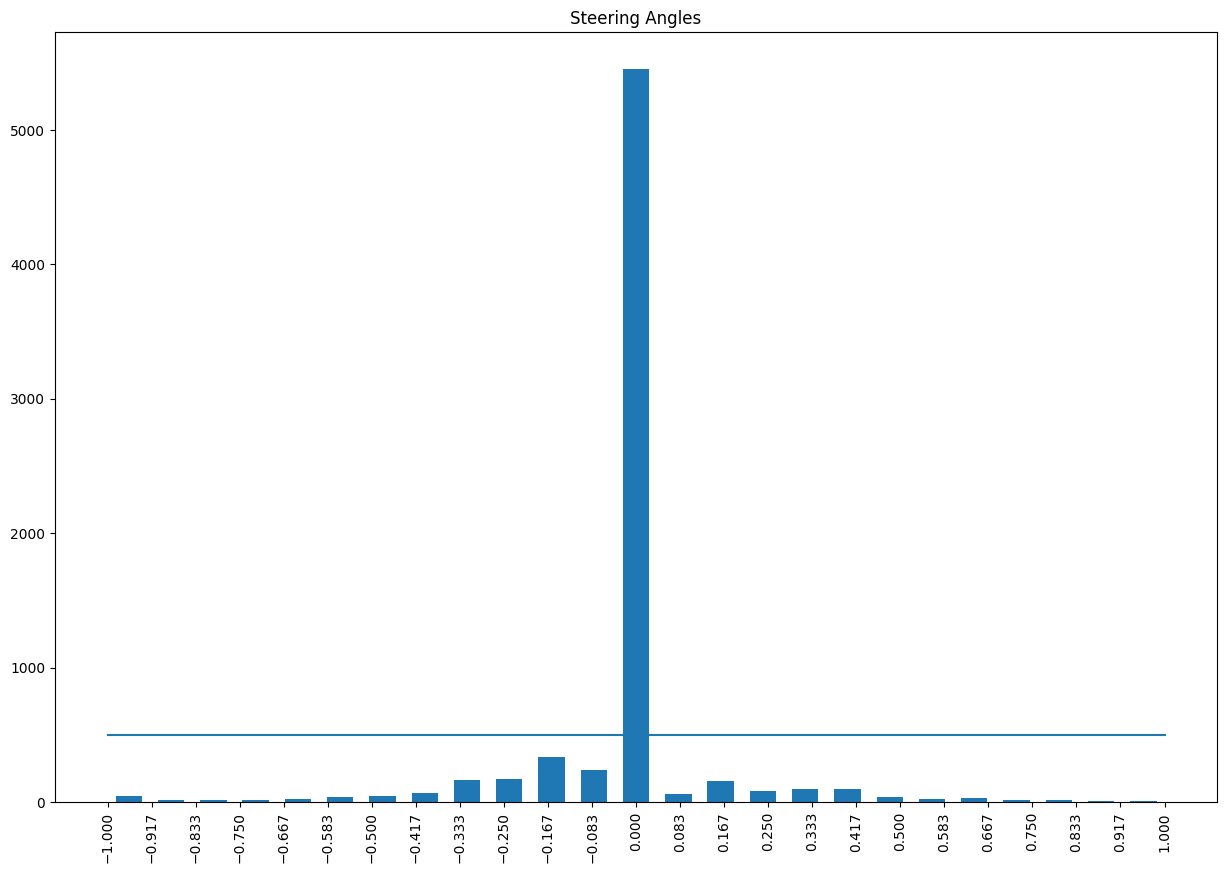

In [ ]:
#Visualizing the Steering Angles
threshold = 500
plt.figure(figsize=(15,10))
plt.bar(center,hist,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=90)
(x1,x2) = (np.min(dataset['steering']),np.max(dataset['steering']))
(y1,y2) = (threshold,threshold)
plt.title('Steering Angles')
plt.plot((x1,x2),(y1,y2))

In [ ]:
#Removes points in the dataset where there is oversteering (To balance dataset)
remove_list = []
for i in range(num_bins):
  List = []
  for j in range(len(dataset['steering'])):
    if dataset['steering'][j] >= bins[i] and dataset['steering'][j] <= bins[i+1]:
      List.append(j)
  List = shuffle(List)
  List = List[threshold:]
  remove_list.extend(List)

In [ ]:
len(dataset['steering'])

7259

In [ ]:
len(remove_list)

4954

In [ ]:
dataset.drop(dataset.index[remove_list],inplace=True)

In [ ]:
hist,_ = np.histogram(dataset['steering'],num_bins)

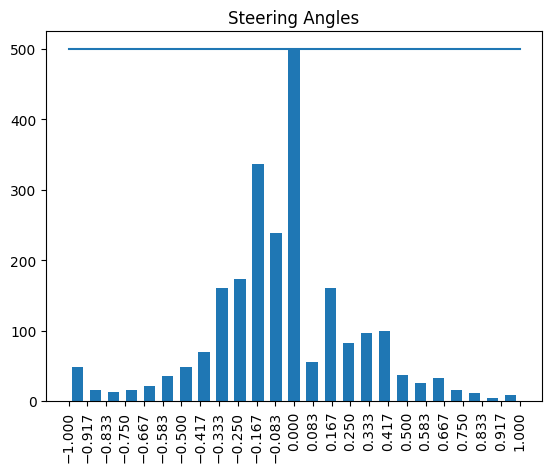

In [ ]:
plt.bar(center,hist,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=90)
(x1,x2) = (np.min(dataset['steering']),np.max(dataset['steering']))
(y1,y2) = (threshold,threshold)
plt.title('Steering Angles')
plt.plot((x1,x2),(y1,y2))

In [ ]:
dataset.iloc[1] #First index data

,14
center,center_2018_10_17_16_36_32_563.jpg
left,left_2018_10_17_16_36_32_563.jpg
right,right_2018_10_17_16_36_32_563.jpg
steering,0.0
throttle,0.0
reverse,0.0
speed,0.000078


In [ ]:
#func to prepare image dataset for training and testing
def loadImageSteering(datadir,dataset):
  imagePath = []
  steeringPath = []
  for i in range(len(dataset)):
    center = dataset.iloc[i][0]
    steering = float(dataset.iloc[i][3])
    imagePath.append(os.path.join(datadir,center))
    steeringPath.append(steering)
  imagePath = np.asarray(imagePath)
  steeringPath = np.asarray(steeringPath)
  return imagePath,steeringPath

In [ ]:
dataset.iloc[0][0]

<ipython-input-37-ddb3c8b6720d>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataset.iloc[0][0]


'center_2018_10_17_16_36_31_484.jpg'

In [ ]:
imagePath,steeringPath = loadImageSteering(datadir+'/IMG',dataset)

<ipython-input-36-370fd3c6a734>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center = dataset.iloc[i][0]
<ipython-input-36-370fd3c6a734>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering = float(dataset.iloc[i][3])


In [ ]:
imagePath[0]

'/content/selfdriving-car-dataset/data-master/IMG/center_2018_10_17_16_36_31_484.jpg'

In [ ]:
len(steeringPath)

2305

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(imagePath,steeringPath,random_state=6,test_size=0.2)

In [ ]:
len(x_train)

1844

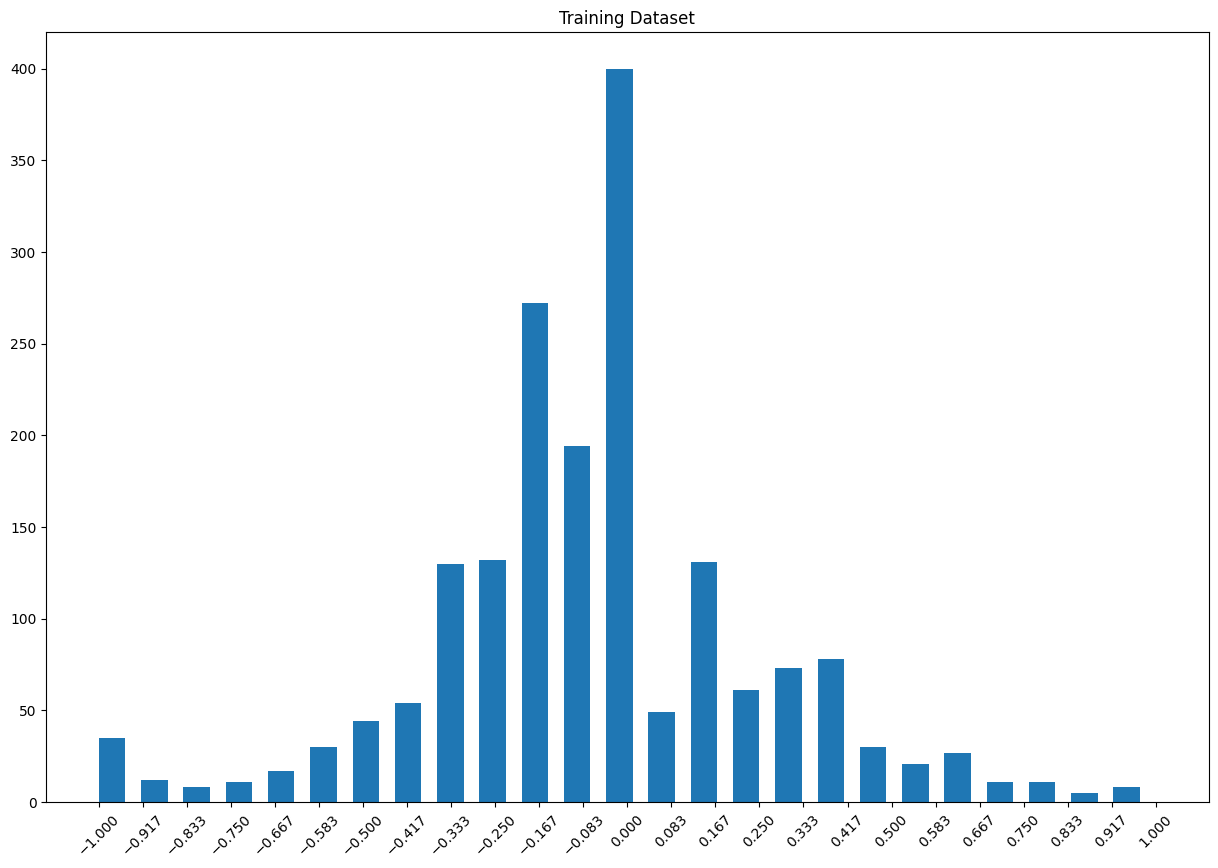

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(y_train,bins=num_bins,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=45)
plt.title("Training Dataset")
plt.show()

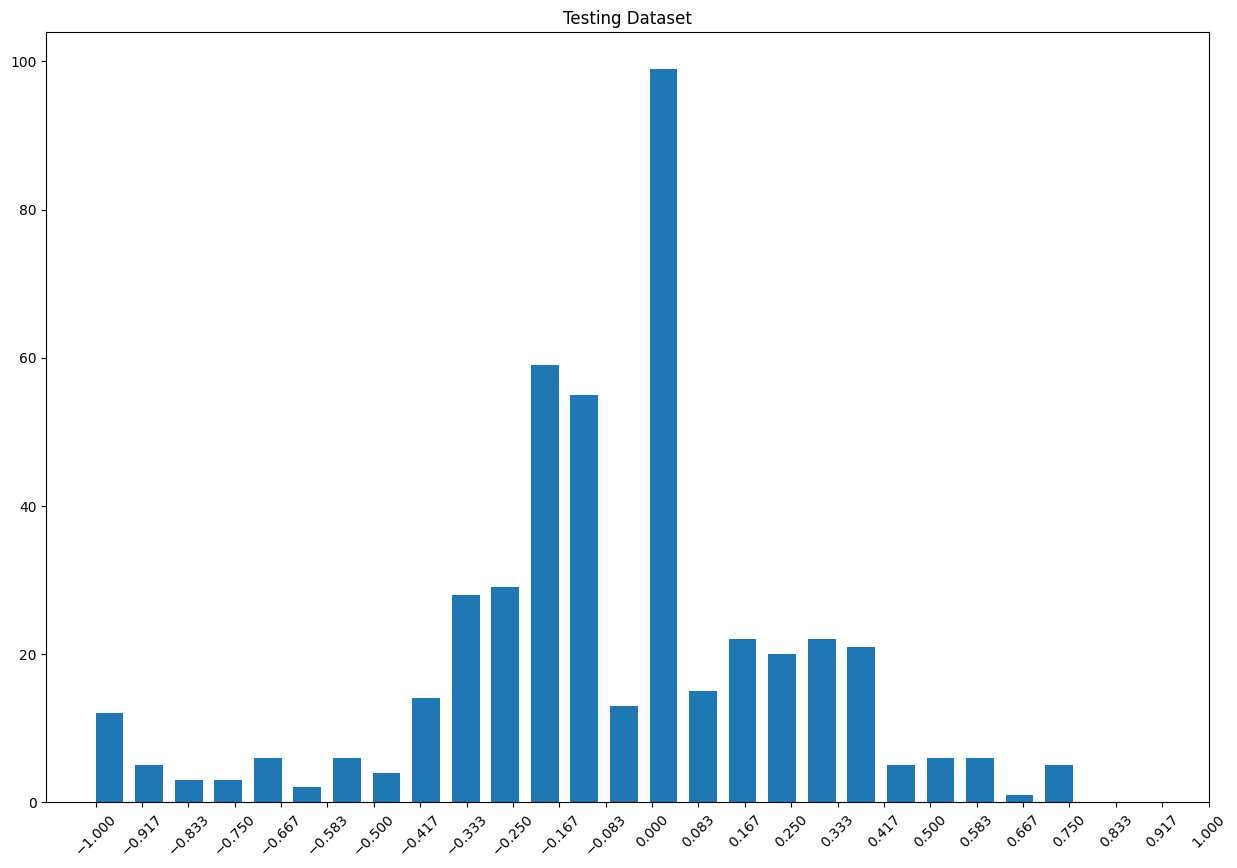

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(y_test,bins=num_bins,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=45)
plt.title("Testing Dataset")
plt.show()

In [ ]:
def imagePreprocessing(img):
  img = mpimg.imread(img)
  img = img[60:135,:,:]
  img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img,(3,3),0)
  img = cv2.resize(img,(200,66))
  img = img/255
  return img

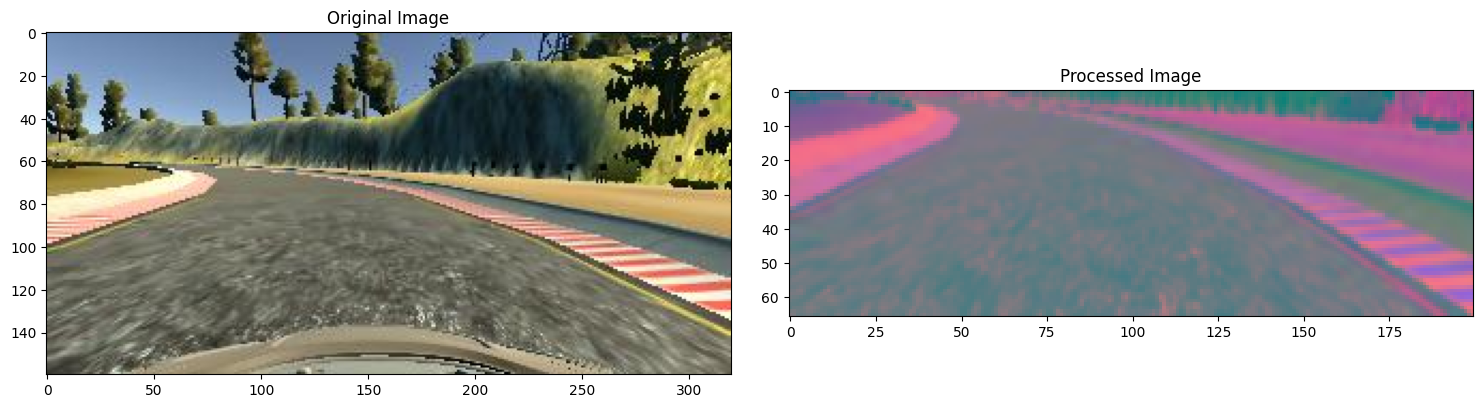

In [ ]:
image = imagePath[1]
image = mpimg.imread(image)
fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].grid(False)
axs[0].set_title("Original Image")
axs[1].imshow(imagePreprocessing(imagePath[1]))
axs[1].grid(False)
axs[1].set_title("Processed Image")
plt.show()

In [ ]:
x_train = np.array(list(map(imagePreprocessing,x_train)))

In [ ]:
x_test = np.array(list(map(imagePreprocessing,x_test)))

In [ ]:
def nvidiaModel():
  model = Sequential()
  model.add(Convolution2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation="elu"))
  model.add(Convolution2D(36,(5,5),strides=(2,2),activation="elu"))
  model.add(Convolution2D(48,(5,5),strides=(2,2),activation="elu"))
  model.add(Convolution2D(64,(3,3),activation="elu"))
  model.add(Convolution2D(64,(3,3),activation="elu"))
  model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(100,activation="elu"))
  model.add(Dropout(0.5))

  model.add(Dense(50,activation="elu"))
  model.add(Dropout(0.5))

  model.add(Dense(10,activation="elu"))
  model.add(Dropout(0.5))

  model.add(Dense(1))
  model.compile(optimizer=Adam(lr=1e-3),loss="mse")

  return model

In [ ]:
#model = nvidiaModel()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

def basic_cnn_model():
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(66, 200, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 2
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 3
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flattening the feature maps
    model.add(Flatten())

    # Fully Connected Layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Prevent overfitting
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))  # Output: steering angle

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    return model

# Create and summarize the basic CNN model
model = basic_cnn_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 198, 16)         │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 97, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 23, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8832)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,130,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,162,529 (4.43 MB)

 Trainable params: 1,162,529 (4.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 198, 16)         │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 97, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 23, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8832)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,130,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,162,529 (4.43 MB)

 Trainable params: 1,162,529 (4.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
h = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=100,shuffle=True,verbose=1)

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 255ms/step - loss: 0.1193 - val_loss: 0.1041
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0958 - val_loss: 0.0754
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0784 - val_loss: 0.0645
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0635 - val_loss: 0.0585
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0618 - val_loss: 0.0521
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0559 - val_loss: 0.0571
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0535 - val_loss: 0.0559
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0543 - val_loss: 0.0522
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0554 - val_loss: 0.0495
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0495 - val_loss: 0.0504
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0439 - val_loss: 0.0490
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0

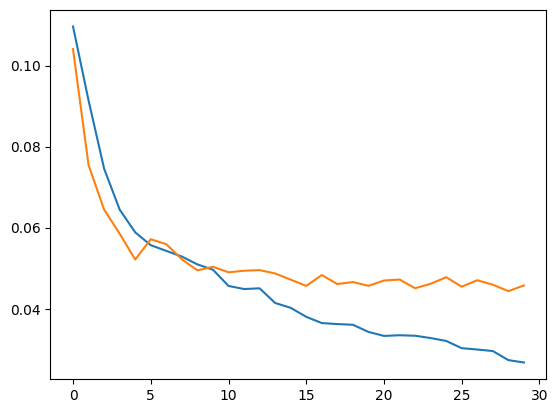

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

In [ ]:
model.save('car.h5')

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Mean Squared Error on Test Data: 0.0457


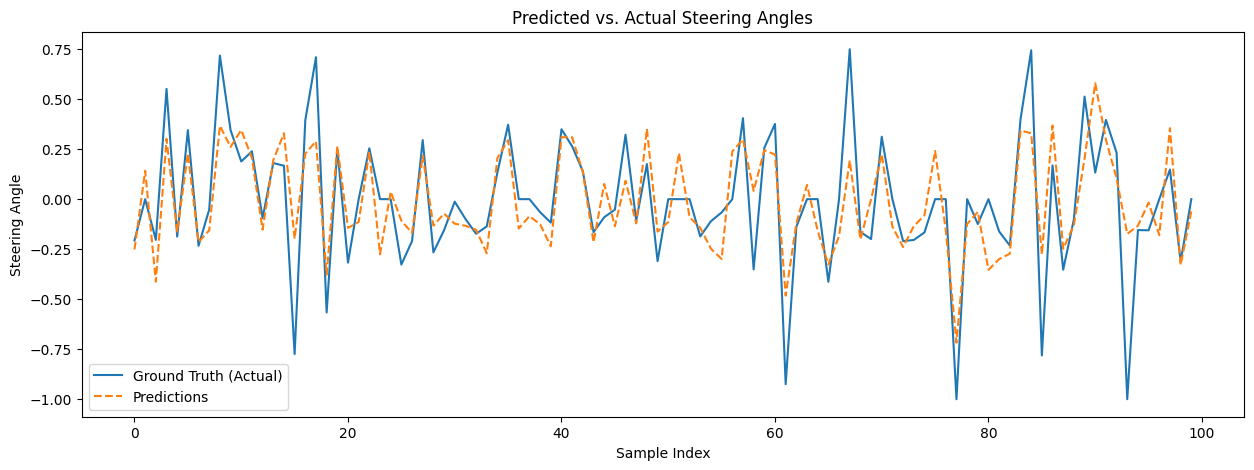

Accuracy within ±0.05 tolerance: 23.43%


23.427331887201735

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error on Test Data: {mse:.4f}")

    return y_pred

# Visualize Predictions vs. Ground Truth
def visualize_predictions(y_test, y_pred, num_samples=100):
    plt.figure(figsize=(15, 5))

    indices = np.random.choice(len(y_test), num_samples, replace=False)
    y_test_samples = y_test[indices]
    y_pred_samples = y_pred[indices]

    plt.plot(y_test_samples, label='Ground Truth (Actual)')
    plt.plot(y_pred_samples, label='Predictions', linestyle='--')
    plt.title("Predicted vs. Actual Steering Angles")
    plt.xlabel("Sample Index")
    plt.ylabel("Steering Angle")
    plt.legend()
    plt.show()

def calculate_accuracy(y_test, y_pred, tolerance=0.05):
    accurate_predictions = np.abs(y_test - y_pred.squeeze()) <= tolerance
    accuracy = np.mean(accurate_predictions) * 100
    print(f"Accuracy within ±{tolerance} tolerance: {accuracy:.2f}%")
    return accuracy

y_pred = evaluate_model(model, x_test, y_test)

visualize_predictions(y_test, y_pred)

calculate_accuracy(y_test, y_pred, tolerance=0.05)
